In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
plt.rcParams.update({'font.size': 22})
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/My Drive/arima/trainandtest/O3sensor_train - O3sensor - O3 (1) (1) (1) (1).csv')
data.shape

(518, 2)

In [ ]:
data['DATE']=pd.to_datetime(data['DATE'], infer_datetime_format=True)
data=data.set_index(['DATE'])
data.head()

,O3(SENSOR)
DATE,
2020-04-08 08:30:00,56.29
2020-04-08 08:45:00,56.29
2020-04-08 09:00:00,50.04
2020-04-08 09:15:00,50.91
2020-04-08 09:30:00,51.35


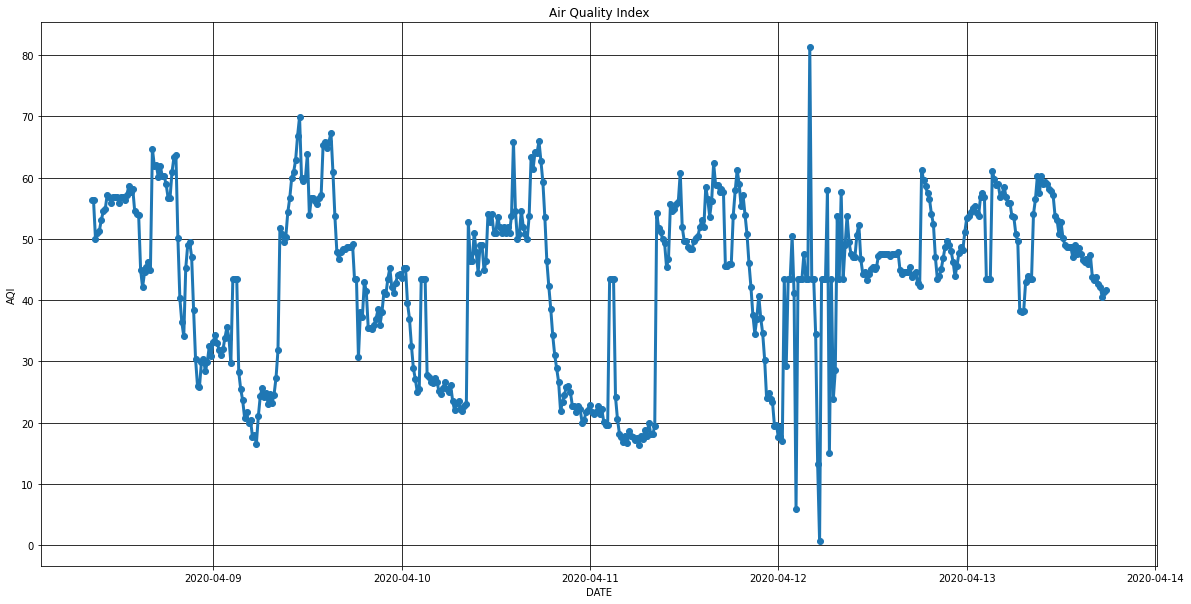

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("DATE")
plt.ylabel("AQI")
plt.title('Air Quality Index')

plt.plot(data, marker='o', label='Air Quality Index', linewidth=3)
plt.grid(color='black')

In [ ]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(data['O3(SENSOR)'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic           -4.163797
p-value                   0.000758
Lags Used                12.000000
No. of Obs              505.000000
Critical Value (1%)      -3.443366
Critical Value (5%)      -2.867280
Critical Value (10%)     -2.569827
dtype: float64


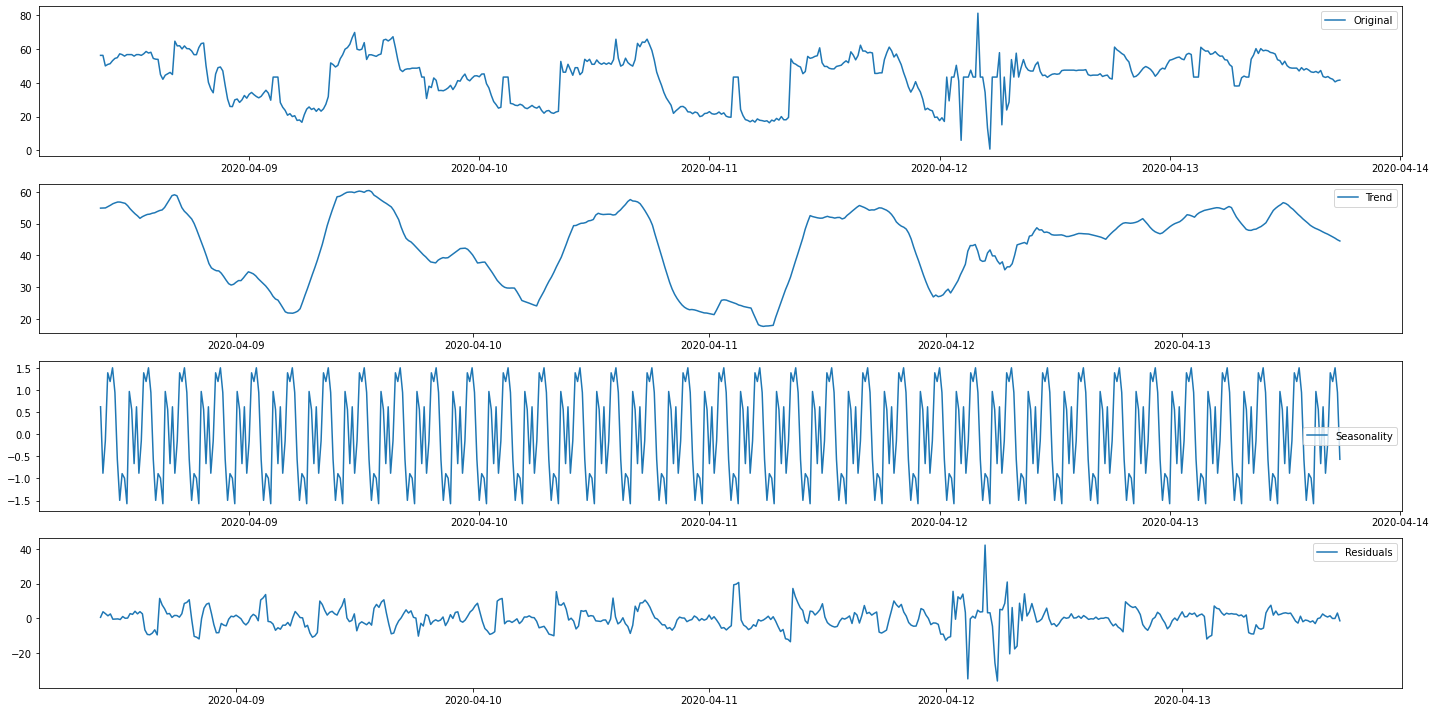

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data,freq=15)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid
plt.figure(figsize=(20,10))
plt.subplot(411)
plt.plot(data, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

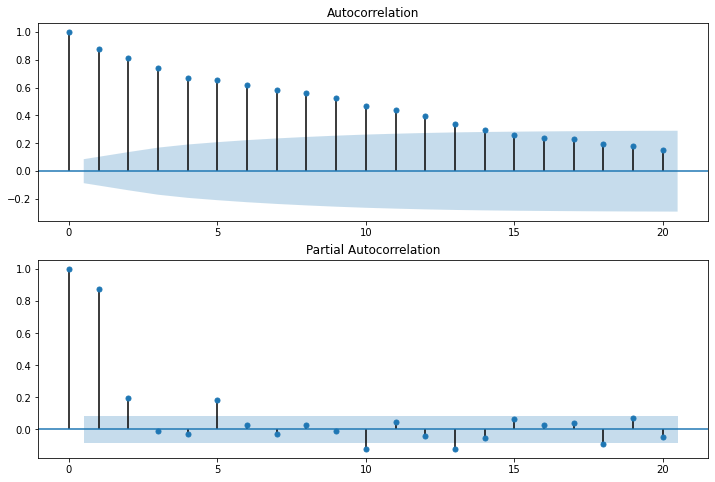

In [ ]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data,lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data,lags=20,ax=ax2)





In [ ]:
from statsmodels.tsa.arima_model import ARIMA
plt.figure(figsize=(20,10))
model=ARIMA(data, order=(20,0,10))
results=model.fit(disp=-1)
plt.plot(data)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-data['O3(SENSOR)'])**2))
print('plotting ARIMA model')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
predictions=pd.Series(results.fittedvalues, copy=True)
print(predictions.head())

DATE
2020-04-08 08:30:00    43.574010
2020-04-08 08:45:00    54.692029
2020-04-08 09:00:00    55.005382
2020-04-08 09:15:00    50.587195
2020-04-08 09:30:00    49.855172
dtype: float64


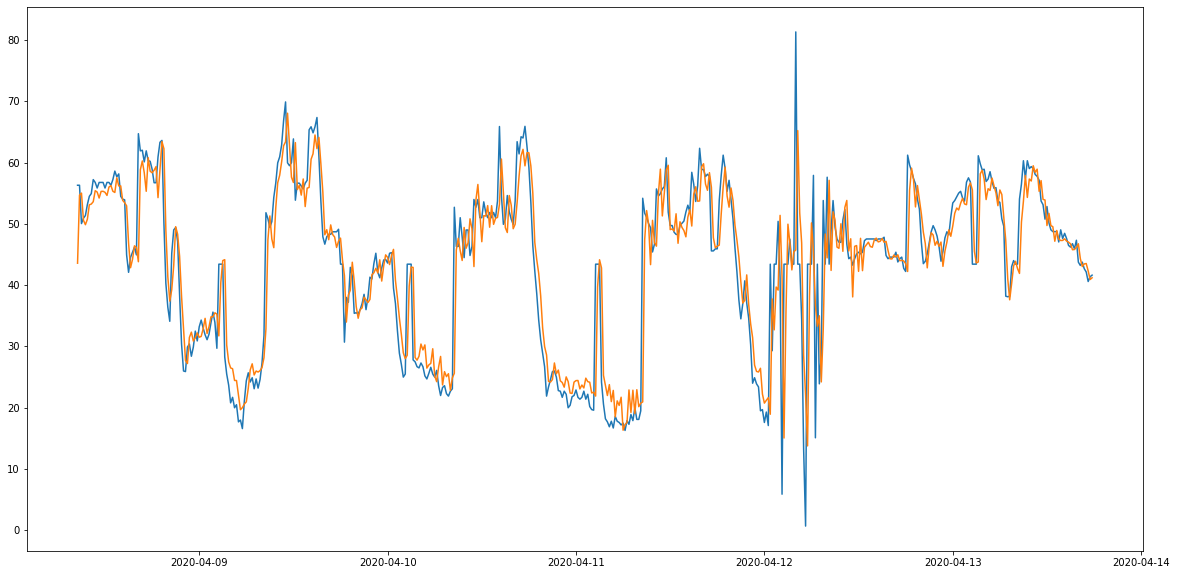

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(data)
plt.plot(predictions)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


Text(0.5, 1.0, 'Forecasting of Air Quality Index')

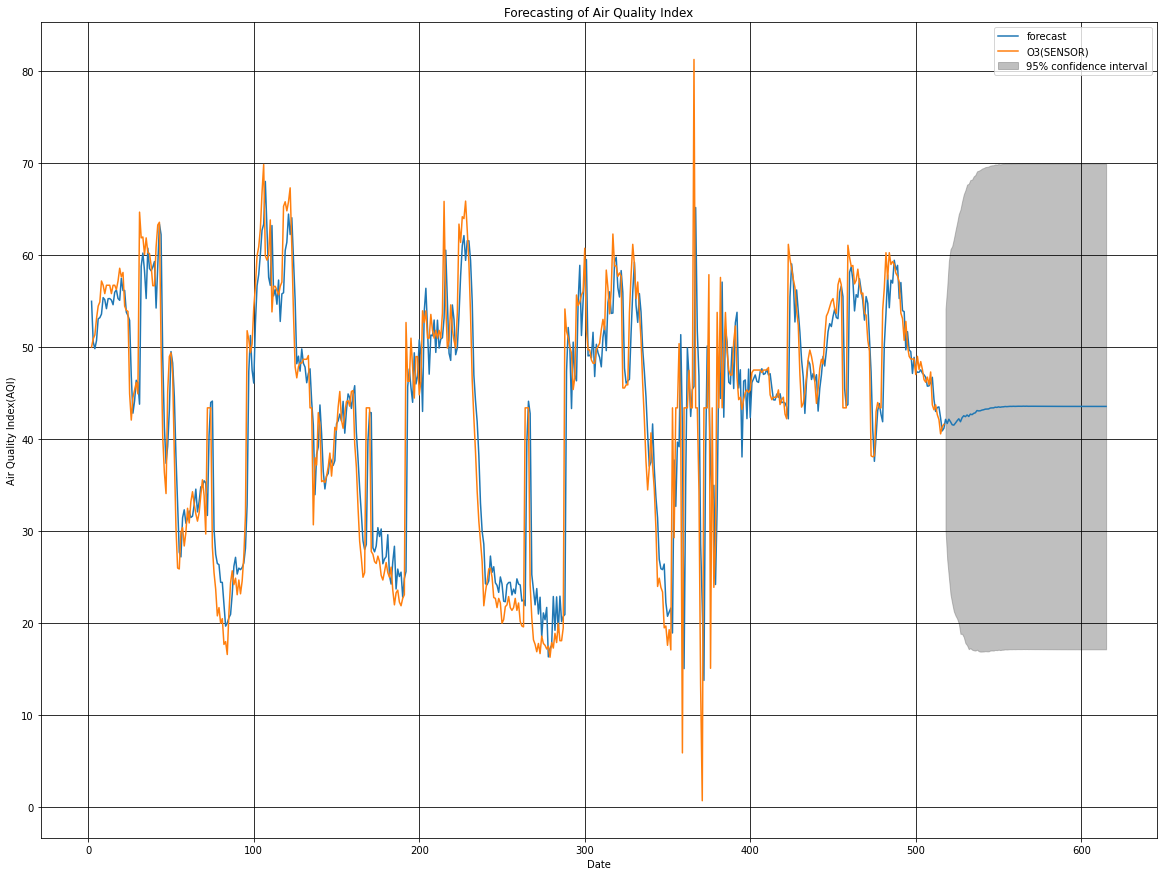

In [ ]:
rcParams['figure.figsize']=20,15
results.plot_predict(2,615)
x=results.forecast(steps=15)
plt.grid(color='black')
plt.xlabel("Date")
plt.ylabel("Air Quality Index(AQI)")
plt.title('Forecasting of Air Quality Index')

In [ ]:
x=results.forecast(steps=15)[0]
print(x)

[42.16681325 41.71773441 42.18163256 41.90307859 41.58088946 41.54042867
 41.76874571 42.02027932 42.23228665 41.91105662 42.34954858 42.56284728
 42.46130067 42.64644606 42.48125146]


In [ ]:
df1 = pd.read_csv(r'/content/drive/My Drive/arima/trainandtest/O3sensor_test - Sheet1.csv')
x = results.forecast(steps=15)[0]
df1 ['Predicted'] = x
df1.to_csv(r'/content/drive/My Drive/arima/trainandtest/O3sensor_test - Sheet1.csv', index = False)

In [ ]:
df1

,DATE,O3(SENSOR),Predicted
0,2020-04-13 14:15:03,48.45,42.166813
1,2020-04-13 14:30:03,47.60,41.717734
2,2020-04-13 14:45:03,46.48,42.181633
3,2020-04-13 15:00:03,46.20,41.903079
4,2020-04-13 15:15:03,46.76,41.580889
5,2020-04-13 15:30:03,45.93,41.540429
6,2020-04-13 15:45:03,47.32,41.768746
7,2020-04-13 16:00:03,43.75,42.020279
8,2020-04-13 16:15:03,43.21,42.232287
9,2020-04-13 16:30:03,43.75,41.911057


In [ ]:
df1['DATE']=pd.to_datetime(df1['DATE'], infer_datetime_format=True)
df1=df1.set_index(['DATE'])
df1.head()

,O3(SENSOR),Predicted
DATE,,
2020-04-13 14:15:03,48.45,42.166813
2020-04-13 14:30:03,47.60,41.717734
2020-04-13 14:45:03,46.48,42.181633
2020-04-13 15:00:03,46.20,41.903079
2020-04-13 15:15:03,46.76,41.580889


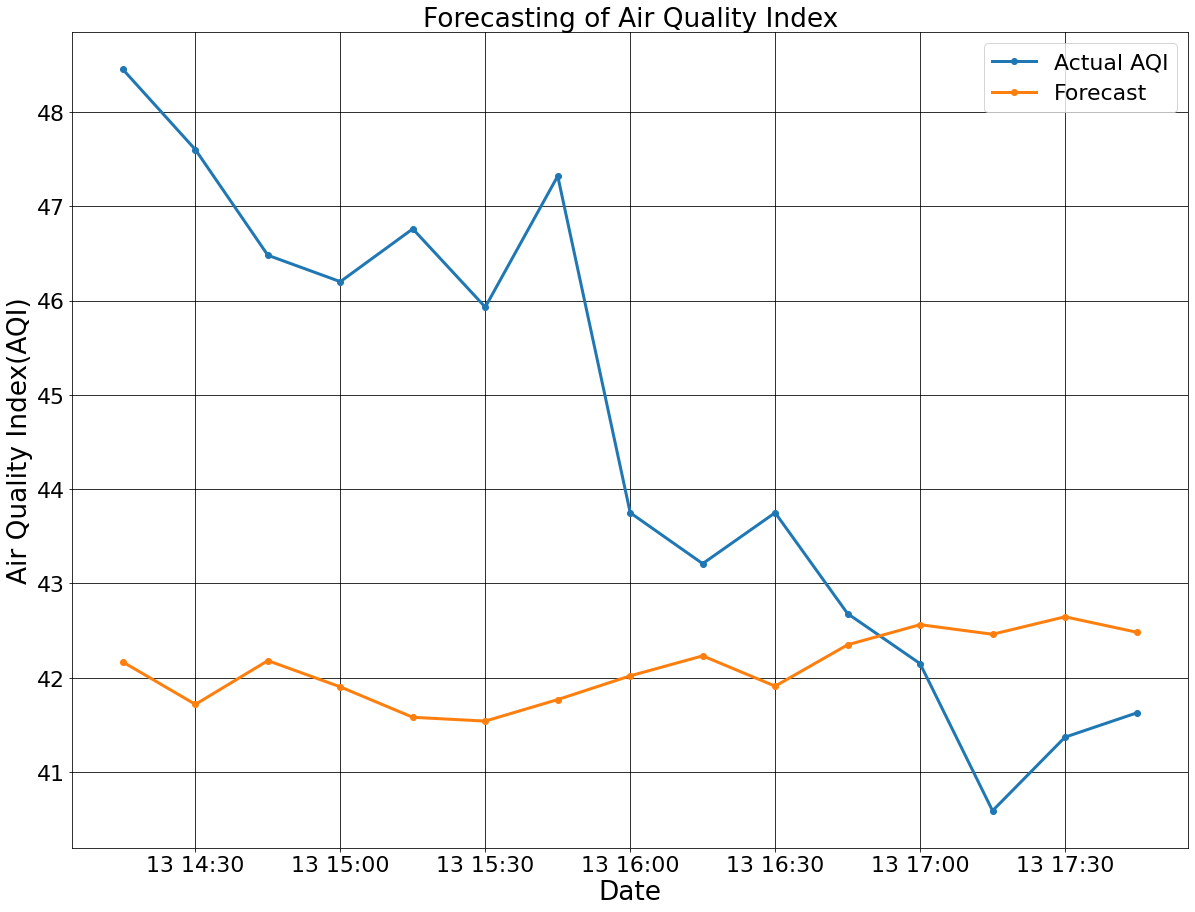

In [ ]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(20,15))
import matplotlib.dates as mdates
import datetime as dt
t = mdates.drange(dt.datetime(2020, 4, 24), dt.datetime(2020, 4, 29),
                  dt.timedelta(hours=24))
independent_variables = ['O3(SENSOR)', 'Predicted']
y = df1[independent_variables] 
plt.plot(y, marker='o', linewidth=3)
#plt.plot(y, marker='o', label='Air Quality Index', linewidth=3)
plt.xlabel("Date", fontsize='large')
plt.ylabel("Air Quality Index(AQI)",fontsize='large')
plt.title('Forecasting of Air Quality Index',fontsize='large')
plt.legend(['Actual AQI', 'Forecast'])
plt.grid(color='black')
# plt.axvspan(*mdates.datestr2num(['2020/04/17', '2020/04/30']), color='grey', alpha=0.5)
plt.show()

In [ ]:
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error
df1['SST'] = np.square(df1['O3(SENSOR)'] - df1['Predicted'].mean())
df1['SSR'] = np.square(df1['Predicted'] - df1['O3(SENSOR)'].mean())
print("Sum of SSR:", df1['SSR'].sum())
print ("Sum of SST:", df1['SST'].sum())
print ("R Squared : ", df1['SSR'].sum() / df1['SST'].sum())
print ("Mean Absolute Error: ", mean_absolute_error(df1['O3(SENSOR)'],df1['Predicted']))
print ("Root Mean Squared Error: ", np.sqrt(mean_squared_error(df1['O3(SENSOR)'],df1['Predicted'])))

Sum of SSR: 89.86600636283647
Sum of SST: 180.13171006250383
R Squared :  0.49889054143578554
Mean Absolute Error:  3.0112901098626237
Root Mean Squared Error:  3.6641674600292555
